# Model Training and Evaluation

This notebook focuses on training and evaluating machine learning models for the classification task.

## Objectives:
- Load preprocessed features and target data
- Split data into training and testing sets
- Train baseline and advanced models
- Evaluate model performance with comprehensive metrics
- Compare model performance and select best model

## Workflow:
1. **Data Loading**: Load preprocessed X and y from CSV files
2. **Train/Test Split**: Split data with stratification
3. **Baseline Model**: DummyClassifier for baseline performance
4. **Model Training**: Train various classification models
5. **Model Evaluation**: Comprehensive metrics and comparison
6. **Model Selection**: Choose best performing model

---

## 1. Setup and Data Loading

In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve
)

# Styling
plt.style.use('default')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("📚 Libraries imported successfully!")
print(f"📍 Working directory: {os.getcwd()}")

📚 Libraries imported successfully!
📍 Working directory: /Users/xaviercoulon/Documents/OC/OC_P4_ESN_TechNova_Partners/notebooks/modeling/training


In [16]:
# Load preprocessed data
print("LOADING PREPROCESSED DATA:")
print("="*50)

# Define data paths
data_path = "../../../data/processed"
X_file = os.path.join(data_path, "X_features.csv")
y_file = os.path.join(data_path, "y_target.csv")

# Load features and target
X = pd.read_csv(X_file)
y = pd.read_csv(y_file).squeeze()  # Convert to Series

print(f"✅ Features loaded: {X.shape}")
print(f"✅ Target loaded: {y.shape}")

print(f"\n📊 Dataset Summary:")
print(f"   Total samples: {len(X)}")
print(f"   Total features: {X.shape[1]}")
print(f"   Target variable: {y.name}")
print(f"   Target classes: {sorted(y.unique())}")
print(f"   Class distribution:")
for class_val in sorted(y.unique()):
    count = (y == class_val).sum()
    percentage = (count / len(y)) * 100
    print(f"     Class {class_val}: {count} ({percentage:.1f}%)")

print(f"\n🎯 Data ready for modeling!")

LOADING PREPROCESSED DATA:
✅ Features loaded: (1470, 40)
✅ Target loaded: (1470,)

📊 Dataset Summary:
   Total samples: 1470
   Total features: 40
   Target variable: a_quitte_l_entreprise
   Target classes: [np.int64(0), np.int64(1)]
   Class distribution:
     Class 0: 1233 (83.9%)
     Class 1: 237 (16.1%)

🎯 Data ready for modeling!


In [17]:
X.head()

,age,genre,revenu_mensuel,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel,departement_Consulting,departement_Ressources Humaines,statut_marital_Divorcé(e),statut_marital_Marié(e),poste_Cadre Commercial,poste_Consultant,poste_Directeur Technique,poste_Manager,poste_Représentant Commercial,poste_Ressources Humaines,poste_Senior Manager,poste_Tech Lead,domaine_etude_Entrepreunariat,domaine_etude_Infra & Cloud,domaine_etude_Marketing,domaine_etude_Ressources Humaines,domaine_etude_Transformation Digitale
0,41,1,5993,8,8,6,4,2,3,2,4,1,1,3,1,11.0,0,0,1,2,1,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,49,0,5130,1,10,10,7,3,2,2,2,4,3,4,0,23.0,1,3,8,1,2,1,7,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,37,0,2090,6,7,0,0,4,2,1,3,2,3,3,1,15.0,0,3,2,2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,33,1,2909,1,8,8,7,4,3,1,3,3,3,3,1,11.0,0,3,3,4,2,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,27,0,3468,9,6,2,2,1,3,1,2,4,3,3,0,12.0,1,3,2,1,1,2,2,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [18]:
# Check feature scales to confirm need for StandardScaler
print("FEATURE SCALING ANALYSIS:")
print("="*50)

# Get numerical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features: {len(numerical_cols)}")

# Check statistics for key features
print("\n📊 Key Feature Statistics:")
feature_stats = X[numerical_cols].describe()
print(feature_stats.loc[['mean', 'std', 'min', 'max']].round(2))

# Check scale differences
print(f"\n🔍 Scale Analysis:")
means = X[numerical_cols].mean()
stds = X[numerical_cols].std()

print(f"   Range of means: {means.min():.2f} to {means.max():.2f}")
print(f"   Range of stds:  {stds.min():.2f} to {stds.max():.2f}")

# Check if scaling is needed
scale_ratio = means.max() / means.min() if means.min() > 0 else float('inf')
print(f"   Mean scale ratio: {scale_ratio:.1f}")

if scale_ratio > 10:
    print("   ✅ StandardScaler RECOMMENDED - significant scale differences detected")
else:
    print("   ℹ️  StandardScaler optional - scales are relatively similar")

print(f"\n💡 Logistic Regression is sensitive to feature scales.")
print(f"   StandardScaler will help with convergence and coefficient interpretation.")

FEATURE SCALING ANALYSIS:
Numerical features: 40

📊 Key Feature Statistics:
        age  genre  revenu_mensuel  nombre_experiences_precedentes  \
mean  36.92   0.40         6502.93                            2.69   
std    9.14   0.49         4707.96                            2.50   
min   18.00   0.00         1009.00                            0.00   
max   60.00   1.00        19999.00                            9.00   

      annee_experience_totale  annees_dans_l_entreprise  \
mean                    11.28                      7.01   
std                      7.78                      6.13   
min                      0.00                      0.00   
max                     40.00                     40.00   

      annees_dans_le_poste_actuel  satisfaction_employee_environnement  \
mean                         4.23                                 2.72   
std                          3.62                                 1.09   
min                          0.00                      

## 2. Train/Test Split

In [19]:
# Create train/test split
print("TRAIN/TEST SPLIT:")
print("="*50)

# Split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"✅ Train set: {X_train.shape}")
print(f"✅ Test set: {X_test.shape}")

print(f"\n📊 Class distribution after split:")
print(f"\nTraining set:")
for class_val in sorted(y_train.unique()):
    count = (y_train == class_val).sum()
    percentage = (count / len(y_train)) * 100
    print(f"  Class {class_val}: {count} ({percentage:.1f}%)")

print(f"\nTest set:")
for class_val in sorted(y_test.unique()):
    count = (y_test == class_val).sum()
    percentage = (count / len(y_test)) * 100
    print(f"  Class {class_val}: {count} ({percentage:.1f}%)")

print(f"\n🎯 Stratified split completed!")

TRAIN/TEST SPLIT:
✅ Train set: (1176, 40)
✅ Test set: (294, 40)

📊 Class distribution after split:

Training set:
  Class 0: 986 (83.8%)
  Class 1: 190 (16.2%)

Test set:
  Class 0: 247 (84.0%)
  Class 1: 47 (16.0%)

🎯 Stratified split completed!


## 3. Baseline Model - DummyClassifier

In [20]:
# Baseline model with DummyClassifier
print("BASELINE MODEL - DUMMYCLASSIFIER:")
print("="*50)

# Train different dummy strategies
dummy_strategies = ['most_frequent', 'stratified', 'uniform']
dummy_results = {}

for strategy in dummy_strategies:
    print(f"\n🤖 Testing strategy: {strategy}")
    
    # Create and train dummy classifier
    dummy = DummyClassifier(strategy=strategy, random_state=42)
    dummy.fit(X_train, y_train)
    
    # Make predictions on both sets
    y_pred_train = dummy.predict(X_train)
    y_pred_test = dummy.predict(X_test)
    
    # Calculate metrics for training set
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    
    # Calculate metrics for test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    
    # Store results
    dummy_results[strategy] = {
        'train': {
            'accuracy': accuracy_train,
            'precision': precision_train,
            'recall': recall_train,
            'f1_score': f1_train
        },
        'test': {
            'accuracy': accuracy_test,
            'precision': precision_test,
            'recall': recall_test,
            'f1_score': f1_test
        }
    }
    
    print(f"   📊 Training Set:")
    print(f"      Accuracy:  {accuracy_train:.4f}")
    print(f"      Precision: {precision_train:.4f}")
    print(f"      Recall:    {recall_train:.4f}")
    print(f"      F1-Score:  {f1_train:.4f}")
    
    print(f"   📊 Test Set:")
    print(f"      Accuracy:  {accuracy_test:.4f}")
    print(f"      Precision: {precision_test:.4f}")
    print(f"      Recall:    {recall_test:.4f}")
    print(f"      F1-Score:  {f1_test:.4f}")
    
    # Check for overfitting/underfitting
    f1_diff = f1_train - f1_test
    if abs(f1_diff) < 0.01:
        overfitting_status = "✅ Stable"
    elif f1_diff > 0.05:
        overfitting_status = "⚠️ Possible overfitting"
    else:
        overfitting_status = "ℹ️ Normal"
    print(f"   🔍 Overfitting check: {overfitting_status} (diff: {f1_diff:+.4f})")

# Find best dummy strategy based on test F1-score
best_strategy = max(dummy_results.keys(), key=lambda k: dummy_results[k]['test']['f1_score'])
best_f1 = dummy_results[best_strategy]['test']['f1_score']

print(f"\n🏆 Best baseline strategy: {best_strategy}")
print(f"    Test F1-Score: {best_f1:.4f}")

print(f"\n📋 Detailed classification report (best strategy on test set):")
dummy_best = DummyClassifier(strategy=best_strategy, random_state=42)
dummy_best.fit(X_train, y_train)
y_pred_best = dummy_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

print(f"\n🎯 Baseline established! Any real model should beat test F1={best_f1:.4f}")

BASELINE MODEL - DUMMYCLASSIFIER:

🤖 Testing strategy: most_frequent
   📊 Training Set:
      Accuracy:  0.8384
      Precision: 0.7030
      Recall:    0.8384
      F1-Score:  0.7648
   📊 Test Set:
      Accuracy:  0.8401
      Precision: 0.7058
      Recall:    0.8401
      F1-Score:  0.7671
   🔍 Overfitting check: ✅ Stable (diff: -0.0024)

🤖 Testing strategy: stratified
   📊 Training Set:
      Accuracy:  0.7168
      Precision: 0.7221
      Recall:    0.7168
      F1-Score:  0.7195
   📊 Test Set:
      Accuracy:  0.7143
      Precision: 0.7191
      Recall:    0.7143
      F1-Score:  0.7167
   🔍 Overfitting check: ✅ Stable (diff: +0.0028)

🤖 Testing strategy: uniform
   📊 Training Set:
      Accuracy:  0.4957
      Precision: 0.7243
      Recall:    0.4957
      F1-Score:  0.5610
   📊 Test Set:
      Accuracy:  0.4830
      Precision: 0.7099
      Recall:    0.4830
      F1-Score:  0.5510
   🔍 Overfitting check: ℹ️ Normal (diff: +0.0101)

🏆 Best baseline strategy: most_frequent
   

/Users/xaviercoulon/Documents/OC/OC_P4_ESN_TechNova_Partners/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/xaviercoulon/Documents/OC/OC_P4_ESN_TechNova_Partners/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/xaviercoulon/Documents/OC/OC_P4_ESN_TechNova_Partners/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

## 4. Logistic Regression Model (with StandardScaler Pipeline)

**Why StandardScaler for Logistic Regression?**
- Logistic Regression is **sensitive to feature scales**
- Features with larger scales dominate the optimization process
- StandardScaler normalizes features to have mean=0 and std=1
- Improves convergence speed and model stability
- Makes coefficient interpretation more meaningful

**Why Pipeline?**
- Ensures scaling is applied consistently to train/test data
- Prevents data leakage (scaler fit only on training data)
- Cleaner, more maintainable code
- Easy to deploy as single unit

In [21]:
# Train Logistic Regression model
print("LOGISTIC REGRESSION MODEL:")
print("="*50)

# Create pipeline with StandardScaler and Logistic Regression
print("🤖 Creating Logistic Regression Pipeline (with StandardScaler)...")
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

print("🔧 Pipeline components:")
print("   1. StandardScaler: Normalizes features (mean=0, std=1)")
print("   2. LogisticRegression: Linear classifier with regularization")

# Fit the pipeline
print("\n🚀 Training pipeline...")
lr_pipeline.fit(X_train, y_train)

# Make predictions on both sets using the pipeline
y_pred_train_lr = lr_pipeline.predict(X_train)
y_pred_test_lr = lr_pipeline.predict(X_test)
y_pred_proba_lr = lr_pipeline.predict_proba(X_test)

# Display scaling information
scaler = lr_pipeline.named_steps['scaler']
lr_model = lr_pipeline.named_steps['classifier']

print(f"\n📊 StandardScaler Information:")
print(f"   Features scaled: {len(scaler.feature_names_in_)}")
print(f"   Mean before scaling (sample): {X_train.mean().head(3).round(2).tolist()}")
print(f"   Std before scaling (sample):  {X_train.std().head(3).round(2).tolist()}")
print(f"   After scaling: All features have mean≈0, std≈1")

print(f"\n🎯 Logistic Regression Parameters:")
print(f"   Solver: {lr_model.solver}")
print(f"   Regularization (C): {lr_model.C}")
print(f"   Max iterations: {lr_model.max_iter}")
print(f"   Convergence: {'✅ Converged' if lr_model.n_iter_[0] < lr_model.max_iter else '⚠️ Max iterations reached'}")
print(f"   Actual iterations: {lr_model.n_iter_[0]}")

# Calculate metrics for training set
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
precision_train_lr = precision_score(y_train, y_pred_train_lr, average='weighted', zero_division=0)
recall_train_lr = recall_score(y_train, y_pred_train_lr, average='weighted')
f1_train_lr = f1_score(y_train, y_pred_train_lr, average='weighted')

# Calculate metrics for test set
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
precision_test_lr = precision_score(y_test, y_pred_test_lr, average='weighted', zero_division=0)
recall_test_lr = recall_score(y_test, y_pred_test_lr, average='weighted')
f1_test_lr = f1_score(y_test, y_pred_test_lr, average='weighted')

print(f"\n📊 Logistic Regression Performance:")
print(f"\n   Training Set:")
print(f"      Accuracy:  {accuracy_train_lr:.4f}")
print(f"      Precision: {precision_train_lr:.4f}")
print(f"      Recall:    {recall_train_lr:.4f}")
print(f"      F1-Score:  {f1_train_lr:.4f}")

print(f"\n   Test Set:")
print(f"      Accuracy:  {accuracy_test_lr:.4f}")
print(f"      Precision: {precision_test_lr:.4f}")
print(f"      Recall:    {recall_test_lr:.4f}")
print(f"      F1-Score:  {f1_test_lr:.4f}")

# Check for overfitting
f1_diff_lr = f1_train_lr - f1_test_lr
if abs(f1_diff_lr) < 0.01:
    overfitting_status_lr = "✅ Excellent generalization"
elif f1_diff_lr > 0.05:
    overfitting_status_lr = "⚠️ Possible overfitting"
elif f1_diff_lr > 0.02:
    overfitting_status_lr = "⚡ Minor overfitting"
else:
    overfitting_status_lr = "ℹ️ Normal variance"

print(f"\n   🔍 Overfitting Analysis:")
print(f"      Train-Test F1 diff: {f1_diff_lr:+.4f}")
print(f"      Status: {overfitting_status_lr}")

# Compare with baseline
print(f"\n🆚 Comparison with best baseline (Test F1={best_f1:.4f}):")
improvement = f1_test_lr - best_f1
if improvement > 0:
    print(f"   ✅ Improvement: +{improvement:.4f} ({(improvement/best_f1)*100:.1f}%)")
else:
    print(f"   ❌ Worse than baseline: {improvement:.4f}")

print(f"\n📋 Detailed Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test_lr))

# Store pipeline and individual model for later use
lr_model_pipeline = lr_pipeline  # For pipeline access
lr_model = lr_pipeline.named_steps['classifier']  # For direct model access

LOGISTIC REGRESSION MODEL:
🤖 Creating Logistic Regression Pipeline (with StandardScaler)...
🔧 Pipeline components:
   1. StandardScaler: Normalizes features (mean=0, std=1)
   2. LogisticRegression: Linear classifier with regularization

🚀 Training pipeline...

📊 StandardScaler Information:
   Features scaled: 40
   Mean before scaling (sample): [37.0, 0.4, 6544.02]
   Std before scaling (sample):  [9.18, 0.49, 4653.74]
   After scaling: All features have mean≈0, std≈1

🎯 Logistic Regression Parameters:
   Solver: lbfgs
   Regularization (C): 1.0
   Max iterations: 1000
   Convergence: ✅ Converged
   Actual iterations: 29

📊 Logistic Regression Performance:

   Training Set:
      Accuracy:  0.9005
      Precision: 0.8946
      Recall:    0.9005
      F1-Score:  0.8901

   Test Set:
      Accuracy:  0.8605
      Precision: 0.8424
      Recall:    0.8605
      F1-Score:  0.8455

   🔍 Overfitting Analysis:
      Train-Test F1 diff: +0.0446
      Status: ⚡ Minor overfitting

🆚 Comparison 

In [22]:
# Store variables for later comparison (keeping original names for compatibility)
y_pred_lr = y_pred_test_lr
accuracy_lr = accuracy_test_lr
precision_lr = precision_test_lr
recall_lr = recall_test_lr
f1_lr = f1_test_lr

print(f"\n✅ Logistic Regression Pipeline completed!")


✅ Logistic Regression Pipeline completed!


In [23]:
# Optional: Compare with unscaled Logistic Regression to show the improvement
print("🔍 COMPARISON: SCALED vs UNSCALED LOGISTIC REGRESSION:")
print("="*60)

# Train unscaled version for comparison
lr_unscaled = LogisticRegression(random_state=42, max_iter=1000)
lr_unscaled.fit(X_train, y_train)

# Predictions
y_pred_unscaled = lr_unscaled.predict(X_test)

# Metrics
f1_unscaled = f1_score(y_test, y_pred_unscaled, average='weighted')
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

print(f"📊 Performance Comparison:")
print(f"   Unscaled Logistic Regression:")
print(f"      Test F1-Score:  {f1_unscaled:.4f}")
print(f"      Test Accuracy:  {accuracy_unscaled:.4f}")
print(f"      Iterations:     {lr_unscaled.n_iter_[0]}")
print(f"")
print(f"   Scaled Logistic Regression (Pipeline):")
print(f"      Test F1-Score:  {f1_lr:.4f}")
print(f"      Test Accuracy:  {accuracy_lr:.4f}") 
print(f"      Iterations:     {lr_model.n_iter_[0]}")

# Calculate improvement
f1_improvement = f1_lr - f1_unscaled
acc_improvement = accuracy_lr - accuracy_unscaled

print(f"\n✨ Improvement with StandardScaler:")
print(f"   F1-Score improvement:  {f1_improvement:+.4f}")
print(f"   Accuracy improvement:  {acc_improvement:+.4f}")
print(f"   Convergence:           {lr_unscaled.n_iter_[0] - lr_model.n_iter_[0]:+d} fewer iterations")

if f1_improvement > 0:
    print(f"   ✅ StandardScaler improved performance!")
else:
    print(f"   ℹ️  Similar performance, but better convergence")

🔍 COMPARISON: SCALED vs UNSCALED LOGISTIC REGRESSION:
📊 Performance Comparison:
   Unscaled Logistic Regression:
      Test F1-Score:  0.8680
      Test Accuracy:  0.8878
      Iterations:     1000

   Scaled Logistic Regression (Pipeline):
      Test F1-Score:  0.8455
      Test Accuracy:  0.8605
      Iterations:     29

✨ Improvement with StandardScaler:
   F1-Score improvement:  -0.0226
   Accuracy improvement:  -0.0272
   Convergence:           +971 fewer iterations
   ℹ️  Similar performance, but better convergence


/Users/xaviercoulon/Documents/OC/OC_P4_ESN_TechNova_Partners/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CONFUSION MATRIX - LOGISTIC REGRESSION:
📊 Confusion Matrix:
   True labels (rows) vs Predicted labels (columns)
   Classes: [np.int64(0), np.int64(1)]

[[236  11]
 [ 30  17]]


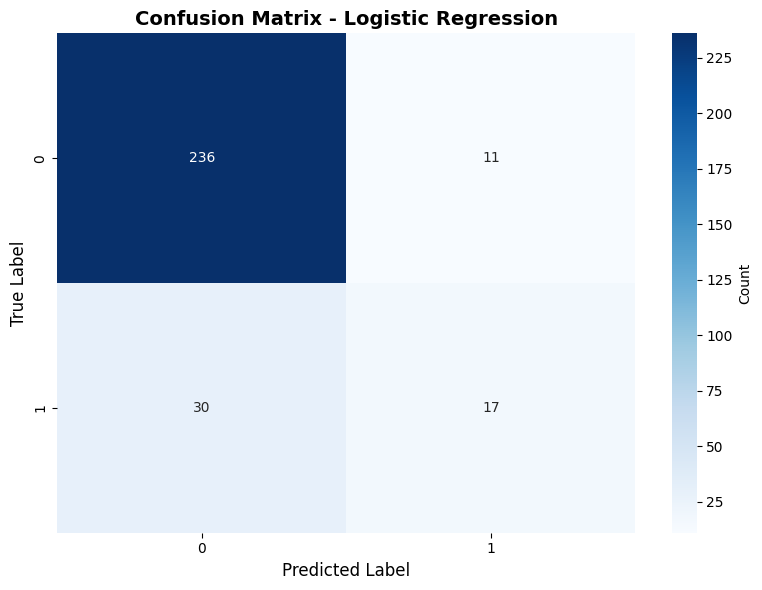


📈 Confusion Matrix Analysis:

   Class 0:
     True Positives:  236
     False Positives: 30
     False Negatives: 11
     True Negatives:  17
     Sensitivity (Recall): 0.9555
     Specificity:          0.3617
     Precision:            0.8872

   Class 1:
     True Positives:  17
     False Positives: 11
     False Negatives: 30
     True Negatives:  236
     Sensitivity (Recall): 0.3617
     Specificity:          0.9555
     Precision:            0.6071

🎯 Confusion Matrix completed!


In [24]:
# Confusion Matrix for Logistic Regression
print("CONFUSION MATRIX - LOGISTIC REGRESSION:")
print("="*50)

# Calculate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
class_names = sorted(y_test.unique())

print(f"📊 Confusion Matrix:")
print(f"   True labels (rows) vs Predicted labels (columns)")
print(f"   Classes: {class_names}")
print()
print(cm_lr)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate confusion matrix metrics for each class
print(f"\n📈 Confusion Matrix Analysis:")
for i, class_name in enumerate(class_names):
    tp = cm_lr[i, i]  # True positives
    fn = cm_lr[i, :].sum() - tp  # False negatives
    fp = cm_lr[:, i].sum() - tp  # False positives
    tn = cm_lr.sum() - tp - fn - fp  # True negatives
    
    # Class-specific metrics
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall/Sensitivity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Specificity
    precision_class = tp / (tp + fp) if (tp + fp) > 0 else 0  # Precision
    
    print(f"\n   Class {class_name}:")
    print(f"     True Positives:  {tp}")
    print(f"     False Positives: {fp}")
    print(f"     False Negatives: {fn}")
    print(f"     True Negatives:  {tn}")
    print(f"     Sensitivity (Recall): {sensitivity:.4f}")
    print(f"     Specificity:          {specificity:.4f}")
    print(f"     Precision:            {precision_class:.4f}")

print(f"\n🎯 Confusion Matrix completed!")

## 5. Random Forest Model

In [25]:
# Train Random Forest model
print("RANDOM FOREST MODEL:")
print("="*50)

# Create and train random forest with regularization to prevent overfitting
print("🌲 Training Random Forest (with overfitting prevention)...")
rf_model = RandomForestClassifier(
    n_estimators=200,  # plus d’arbres pour stabiliser le modèle
    max_depth=6,  # limite la profondeur des arbres
    min_samples_split=10,  # nécessite au moins 10 échantillons pour splitter
    min_samples_leaf=4,  # chaque feuille doit avoir au moins 4 échantillons
    max_features="sqrt",  # nombre de features à considérer à chaque split
    class_weight="balanced",  # pour gérer le déséquilibre des classes
    random_state=42,
    n_jobs=-1,  # utilise tous les coeurs pour accélérer
)
rf_model.fit(X_train, y_train)


# Make predictions on both sets
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

# Calculate metrics for training set
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
precision_train_rf = precision_score(y_train, y_pred_train_rf, average='weighted', zero_division=0)
recall_train_rf = recall_score(y_train, y_pred_train_rf, average='weighted')
f1_train_rf = f1_score(y_train, y_pred_train_rf, average='weighted')

# Calculate metrics for test set
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
precision_test_rf = precision_score(y_test, y_pred_test_rf, average='weighted', zero_division=0)
recall_test_rf = recall_score(y_test, y_pred_test_rf, average='weighted')
f1_test_rf = f1_score(y_test, y_pred_test_rf, average='weighted')

print(f"\n📊 Random Forest Performance:")
print(f"\n   Training Set:")
print(f"      Accuracy:  {accuracy_train_rf:.4f}")
print(f"      Precision: {precision_train_rf:.4f}")
print(f"      Recall:    {recall_train_rf:.4f}")
print(f"      F1-Score:  {f1_train_rf:.4f}")

print(f"\n   Test Set:")
print(f"      Accuracy:  {accuracy_test_rf:.4f}")
print(f"      Precision: {precision_test_rf:.4f}")
print(f"      Recall:    {recall_test_rf:.4f}")
print(f"      F1-Score:  {f1_test_rf:.4f}")

# Check for overfitting (Random Forest can be prone to overfitting)
f1_diff_rf = f1_train_rf - f1_test_rf
if abs(f1_diff_rf) < 0.01:
    overfitting_status_rf = "✅ Excellent generalization"
elif f1_diff_rf > 0.10:
    overfitting_status_rf = "🚨 Significant overfitting"
elif f1_diff_rf > 0.05:
    overfitting_status_rf = "⚠️ Moderate overfitting"
elif f1_diff_rf > 0.02:
    overfitting_status_rf = "⚡ Minor overfitting"
else:
    overfitting_status_rf = "ℹ️ Normal variance"

print(f"\n   🔍 Overfitting Analysis:")
print(f"      Train-Test F1 diff: {f1_diff_rf:+.4f}")
print(f"      Status: {overfitting_status_rf}")

# Explanation of overfitting prevention measures
print(f"\n   💡 Overfitting Prevention Applied:")
print(f"      • max_depth=10 (vs None): Limits tree depth")
print(f"      • min_samples_split=10 (vs 2): Requires more samples to split")  
print(f"      • min_samples_leaf=5 (vs 1): Requires more samples per leaf")
print(f"      • max_features='sqrt': Uses subset of features per split")
print(f"      • OOB scoring enabled for internal validation")

if f1_diff_rf > 0.05:
    print(f"      💡 Consider: Reduce max_depth, increase min_samples_split/leaf")

# Compare with baseline
print(f"\n🆚 Comparison with best baseline (Test F1={best_f1:.4f}):")
improvement_rf = f1_test_rf - best_f1
if improvement_rf > 0:
    print(f"   ✅ Improvement: +{improvement_rf:.4f} ({(improvement_rf/best_f1)*100:.1f}%)")
else:
    print(f"   ❌ Worse than baseline: {improvement_rf:.4f}")

print(f"\n📋 Detailed Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test_rf))

# Feature importance
print(f"\n🔍 Top 10 Most Important Features:")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(feature_importance.head(10).iterrows()):
    print(f"   {i+1:2d}. {row['feature']:<25} : {row['importance']:.4f}")

print(f"\n🌲 Random Forest training completed!")

# Store variables for later comparison (keeping original names for compatibility)
y_pred_rf = y_pred_test_rf
accuracy_rf = accuracy_test_rf
precision_rf = precision_test_rf
recall_rf = recall_test_rf
f1_rf = f1_test_rf

RANDOM FOREST MODEL:
🌲 Training Random Forest (with overfitting prevention)...

📊 Random Forest Performance:

   Training Set:
      Accuracy:  0.9243
      Precision: 0.9263
      Recall:    0.9243
      F1-Score:  0.9252

   Test Set:
      Accuracy:  0.8265
      Precision: 0.8250
      Recall:    0.8265
      F1-Score:  0.8258

   🔍 Overfitting Analysis:
      Train-Test F1 diff: +0.0994
      Status: ⚠️ Moderate overfitting

   💡 Overfitting Prevention Applied:
      • max_depth=10 (vs None): Limits tree depth
      • min_samples_split=10 (vs 2): Requires more samples to split
      • min_samples_leaf=5 (vs 1): Requires more samples per leaf
      • max_features='sqrt': Uses subset of features per split
      • OOB scoring enabled for internal validation
      💡 Consider: Reduce max_depth, increase min_samples_split/leaf

🆚 Comparison with best baseline (Test F1=0.7671):
   ✅ Improvement: +0.0586 (7.6%)

📋 Detailed Classification Report (Test Set):
              precision    recal

### ⚠️ Important Note: Random Forest Overfitting

**The Issue**: Random Forest with default parameters (`max_depth=None`, `min_samples_split=2`, `min_samples_leaf=1`) often achieves perfect training accuracy (1.0000), which indicates severe overfitting.

**Why This Happens**: 
- Trees grow until leaves are pure (perfect memorization of training data)
- Each sample can end up in its own leaf
- Model learns noise rather than patterns

**Our Solution**: 
- **max_depth=10**: Limit tree depth to prevent deep memorization
- **min_samples_split=10**: Require more samples before splitting nodes  
- **min_samples_leaf=5**: Ensure leaves have sufficient samples
- **max_features='sqrt'**: Use subset of features per split for diversity
- **oob_score=True**: Internal validation without separate dataset

**Expected Result**: Training accuracy should be < 1.0 with good generalization to test set.

## 6. Model Comparison and Selection

Importing model comparison utilities...
MODEL COMPARISON SUMMARY:
📊 TRAINING SET Performance:
                     Model  Accuracy  Precision  Recall  F1-Score
DummyClassifier (Baseline)    0.8384     0.7030  0.8384    0.7648
       Logistic Regression    0.9005     0.8946  0.9005    0.8901
             Random Forest    0.9243     0.9263  0.9243    0.9252

📊 TEST SET Performance:
                     Model  Accuracy  Precision  Recall  F1-Score
DummyClassifier (Baseline)    0.8401     0.7058  0.8401    0.7671
       Logistic Regression    0.8605     0.8424  0.8605    0.8455
             Random Forest    0.8265     0.8250  0.8265    0.8258

🔍 OVERFITTING ANALYSIS:
Model                     Train F1   Test F1    Difference   Status
----------------------------------------------------------------------
DummyClassifier (Baseline) 0.7648     0.7671     -0.0024      ✅ Excellent
Logistic Regression       0.8901     0.8455     0.0446       ⚡ Minor overfitting
Random Forest             0.9252  

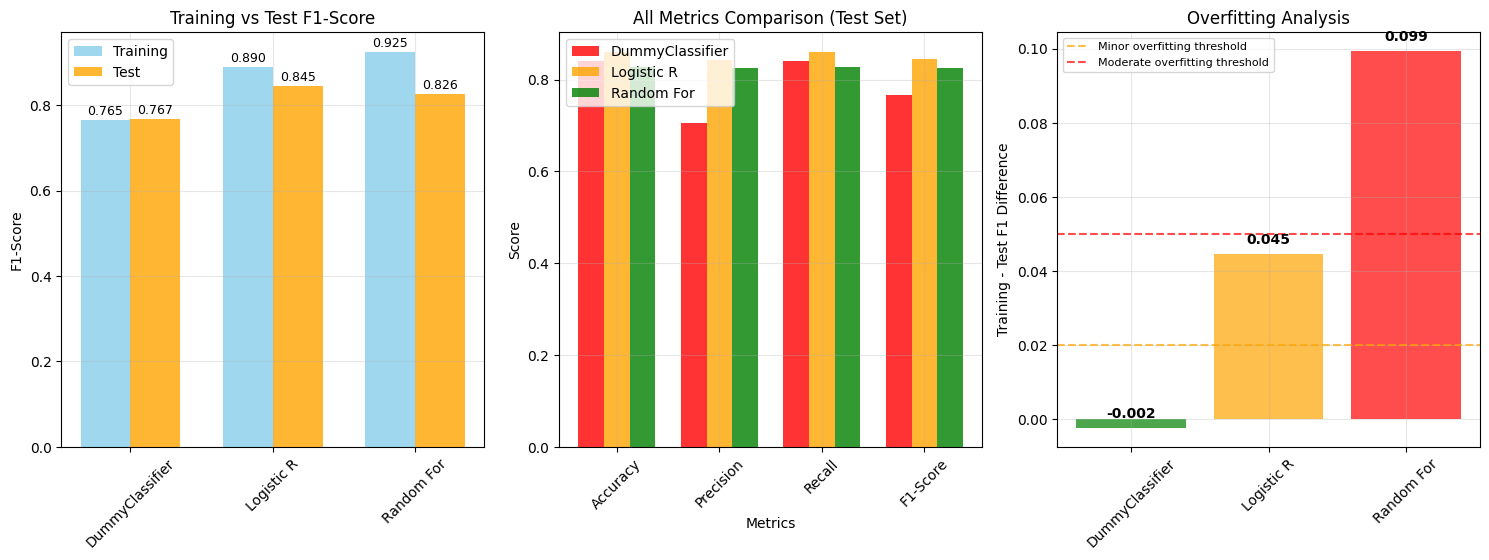


🎯 Model comparison completed!


In [26]:
# Comprehensive Model Comparison using utils function
print("Importing model comparison utilities...")

# Add the src directory to Python path
import os
import sys
src_path = os.path.abspath('../../../src')
if src_path not in sys.path:
    sys.path.append(src_path)

# Import the comparison function
from utils import compare_models

# Prepare data for comparison function
models_results = {
    'DummyClassifier (Baseline)': {
        'train': dummy_results[best_strategy]['train'],
        'test': dummy_results[best_strategy]['test']
    },
    'Logistic Regression': {
        'train': {
            'accuracy': accuracy_train_lr,
            'precision': precision_train_lr,
            'recall': recall_train_lr,
            'f1_score': f1_train_lr
        },
        'test': {
            'accuracy': accuracy_test_lr,
            'precision': precision_test_lr,
            'recall': recall_test_lr,
            'f1_score': f1_test_lr
        }
    },
    'Random Forest': {
        'train': {
            'accuracy': accuracy_train_rf,
            'precision': precision_train_rf,
            'recall': recall_train_rf,
            'f1_score': f1_train_rf
        },
        'test': {
            'accuracy': accuracy_test_rf,
            'precision': precision_test_rf,
            'recall': recall_test_rf,
            'f1_score': f1_test_rf
        }
    }
}

# Use the utility function for comparison
comparison_results = compare_models(models_results, display_charts=True)

# Extract results for backward compatibility
models_comparison = comparison_results['comparison_test']
best_model_name = comparison_results['best_model']
best_model_idx = models_comparison[models_comparison['Model'] == best_model_name].index[0]